# Muscle Visualizer Application Demo

This Python-based application visualizes muscle usage based on workout data, providing insights into muscle group engagement and exercise effectiveness. It leverages various libraries for image processing, data manipulation, and visualization to offer a comprehensive tool for fitness enthusiasts and trainers.

## Table of Contents

1. [Installation](#installation)
2. [Usage](#usage)
3. [Features](#features)
4. [Functions](#functions)
5. [Data Collection](#data-collection)
6. [Visualization](#visualization)
7. [Exercise Recommendation](#exercise-recommendation)

## Installation

Ensure you have the required libraries installed. You can install them using pip:

```bash
pip install pillow matplotlib seaborn pandas numpy etc.
```

## Usage

1. **Loading the Blank Muscle Diagram**: Start by loading a blank muscle diagram for visualization purposes.
2. **Data Collection**: Use the `data_gather.py` script to fetch and prepare workout data from Google Sheets.
3. **Data Manipulation**: Clean and preprocess the data to calculate muscle usage and group intensity.
4. **Visualization**: Generate heat maps to visualize muscle usage and analyze workout effectiveness.

## Features

- **Visual Dictionaries**: Maintain dictionaries for exercises, muscles, and color codes used in visualizations.
- **Data Collection**: Automate data fetching and processing from Google Sheets.
- **Muscle Usage Calculation**: Compute muscle usage based on workout data with customizable decay factors.
- **Visualization**: Create heat maps to visualize muscle intensity on muscle diagrams.
- **Exercise Similarity**: Assess exercise similarity to find alternatives targeting similar muscles.
- **Exercise Recommendations**: Generate personalized exercise recommendations focusing on target muscle groups and workout variety.

## Functions

### Data Manipulation

- **`calculate_muscle_usage`**: Computes muscle usage intensities with configurable decay.
- **`calculate_muscle_group_usage`**: Analyzes major muscle group usage from workout sessions.

### Visualization

- **`generate_title`**: Creates dynamic titles for heat maps based on selected parameters.
- **`visualize_muscle_usage`**: Generates heat maps visualizing muscle intensity on diagrams.

### Reporting

- **`print_workout_details`**: Provides detailed reports for individual workouts.
- **`print_recent_workouts`**: Summarizes recent workouts, highlighting intensity and muscle group distribution.

### Exercise Analysis

- **`calculate_similarity`**: Measures similarity between exercises based on muscle intensity.
- **`generate_similarity_dict`**: Maps exercises to similar ones for easier comparison.

### Exercise Recommendation

- **`calculate_muscle_group_percentage`**: Computes exercise contributions to muscle groups.
- **`calculate_primary_group`**: Identifies the primary muscle group targeted by an exercise.
- **`calculate_target_alignment_score`**: Evaluates how well exercises align with target muscle groups.
- **`recommend_exercises`**: Provides personalized exercise recommendations based on various factors.

## Data Collection

The `data_gather.py` script handles data collection from Google Sheets. Ensure proper API credentials and access permissions are set up.

## Visualization

The application uses the PIL and Matplotlib libraries to manipulate and display muscle diagrams. Color maps and heat maps are generated to reflect muscle usage intensity.

## Exercise Recommendation

The recommendation system considers factors such as exercise effectiveness, recent history, and similarity to ensure balanced and effective workout routines.

Feel free to adjust any sections to better match your project's specifics!

### Library Imports

In [320]:
# Image display
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import seaborn as sns
import colorsys

# Data manipulation and function building
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from collections import Counter, defaultdict

### Loading the Blank Muscle Diagram

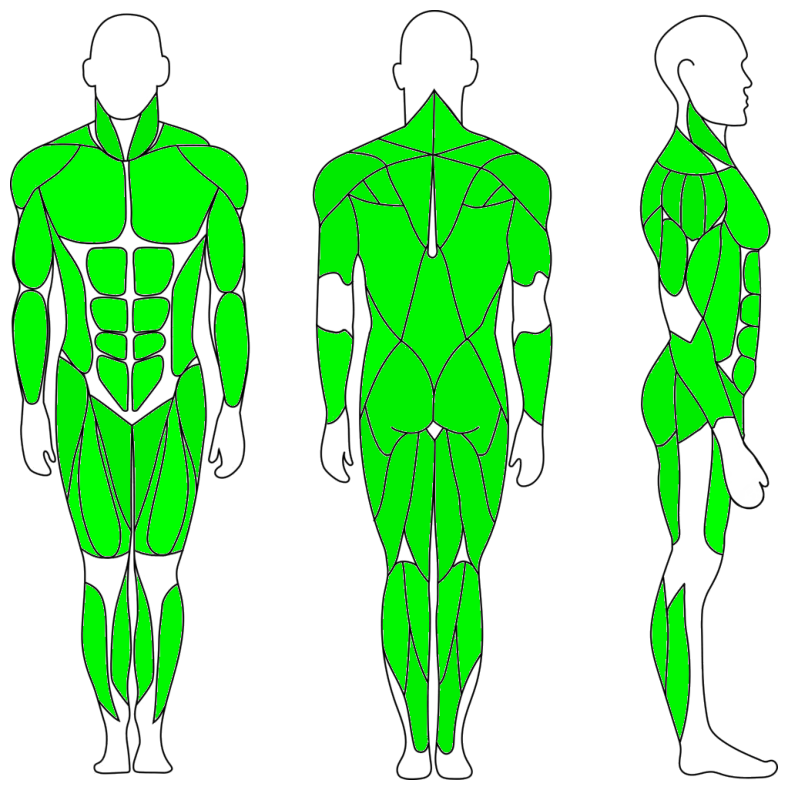

In [321]:
# Image file path
img_path = "muscleFBS.png"

# Open the image file
img = Image.open(img_path)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

### Visual Dictionaries
- Dictionary of exercises with their respective muscles/group usages.
- Dictionary of muscles/groups and their respective diagram color codes. 

In [322]:
visual_muscles = {
    "Bench Press": {"Pectoralis Major": 8, "Triceps": 5, "Front Deltoid": 5, "Rectus Abdominis": 2, "Rear Deltoid": 2, "Sternocleidomastoid": 1},
    "Incline Bench Press": {"Pectoralis Major": 8, "Triceps": 5, "Front Deltoid": 5, "Rectus Abdominis": 2, "Rear Deltoid": 3, "Sternocleidomastoid": 1},
    "Lat Pulldown": {"Latissimus Dorsi": 8, "Biceps": 5, "Forearms": 3, "Rectus Abdominis": 2, "Middle Trapezius": 3, "Lower Trapezius": 3, "Teres Major": 5, "Rear Deltoid": 2, "Sternocleidomastoid": 2},
    "Seated Cable Row": {"Latissimus Dorsi": 5, "Biceps": 5, "Forearms": 3, "Rectus Abdominis": 2, "Middle Trapezius": 4, "Lower Trapezius": 3, "Infraspinatus": 4, "Teres Major": 4, "Rear Deltoid": 2, "Sternocleidomastoid": 1},
    "Shoulder Press": {"Front Deltoid": 8, "Triceps": 5, "Upper Trapezius": 3, "Rectus Abdominis": 2, "Rear Deltoid": 2, "Sternocleidomastoid": 2},
    "Military Press": {"Front Deltoid": 8, "Triceps": 5, "Upper Trapezius": 3, "Rectus Abdominis": 2, "Rear Deltoid": 2, "Sternocleidomastoid": 2},
    "Lateral Raise": {"Lateral Deltoid": 8, "Upper Trapezius": 3, "Middle Trapezius": 3, "Infraspinatus": 4, "Rear Deltoid": 1, "Sternocleidomastoid": 1},
    "Bicep Curl": {"Biceps": 8, "Forearms": 3},
    "Chin-up": {"Latissimus Dorsi": 8, "Biceps": 6, "Forearms": 3, "Rectus Abdominis": 4, "Middle Trapezius": 3, "Lower Trapezius": 3, "Infraspinatus": 4, "Teres Major": 4, "Rear Deltoid": 2, "Sternocleidomastoid": 2},
    "Tricep Extension": {"Triceps": 8},
    "Back Squat": {"Quadriceps": 9, "Gluteus Maximus": 6, "Hamstrings": 5, "Erector Spinae": 4, "Rectus Abdominis": 3, "Hip Abductor": 3, "External Obliques": 3, "Sternocleidomastoid": 2},
    "Front Squat": {"Quadriceps": 8, "Gluteus Maximus": 6, "Rectus Abdominis": 6, "Upper Trapezius": 4, "Hip Abductor": 3, "External Obliques": 4, "Rear Deltoid": 2, "Sternocleidomastoid": 3},
    "Leg Extensions": {"Quadriceps": 8},
    "Deadlift": {"Hamstrings": 8, "Gluteus Maximus": 8, "Erector Spinae": 8, "Upper Trapezius": 6, "Middle Trapezius": 4, "Lower Trapezius": 4, "Infraspinatus": 3, "Teres Major": 3, "Forearms": 4, "Rectus Abdominis": 4, "Hip Abductor": 2, "External Obliques": 4, "Rear Deltoid": 2, "Sternocleidomastoid": 3},
    "Leg Press": {"Quadriceps": 8, "Hamstrings": 6, "Gluteus Maximus": 6, "Hip Abductor": 3},
    "Calf Raises": {"Gastrocnemius": 8, "Achilles": 8},
    "Pull-Up": {"Latissimus Dorsi": 8, "Biceps": 5, "Forearms": 3, "Rectus Abdominis": 3, "Middle Trapezius": 4, "Lower Trapezius": 3, "Infraspinatus": 4, "Teres Major": 5, "Rear Deltoid": 2, "Sternocleidomastoid": 2},
    "Dumbbell Flyes": {"Pectoralis Major": 8, "Front Deltoid": 5, "Rear Deltoid": 2, "Sternocleidomastoid": 1},
    "Lunges": {"Quadriceps": 8, "Gluteus Maximus": 6, "Hamstrings": 4, "Rectus Abdominis": 3, "Hip Abductor": 4, "External Obliques": 3},
    "Bent-over Row": {"Latissimus Dorsi": 6, "Biceps": 5, "Forearms": 3, "Rectus Abdominis": 3, "Middle Trapezius": 5, "Lower Trapezius": 4, "Infraspinatus": 5, "Teres Major": 5, "Rear Deltoid": 3, "Sternocleidomastoid": 2},
    "Romanian Deadlift": {"Hamstrings": 9, "Gluteus Maximus": 6, "Erector Spinae": 4, "Forearms": 3, "Rectus Abdominis": 3, "Hip Abductor": 2, "External Obliques": 4, "Rear Deltoid": 2, "Sternocleidomastoid": 2},
    "Hammer Curl": {"Biceps": 8, "Forearms": 6},
    "Dumbbell Shrugs": {"Upper Trapezius": 9, "Middle Trapezius": 4, "Sternocleidomastoid": 3},
    "Face-pulls": {"Front Deltoid": 7, "Upper Trapezius": 6, "Middle Trapezius": 4, "Infraspinatus": 5, "Teres Major": 4, "Forearms": 3, "Rear Deltoid": 3, "Sternocleidomastoid": 2},
    "Wrist Curl": {"Forearms": 10},
    "Reverse-grip Curl": {"Biceps": 7, "Forearms": 5},
    "Dead Hang": {"Latissimus Dorsi": 5, "Forearms": 8, "Biceps": 3, "Front Deltoid": 4, "Sternocleidomastoid": 1},
    "Hip Abduction": {"Hip Abductor": 8, "Gluteus Maximus": 6, "Quadriceps": 3, "External Obliques": 2, "Rectus Abdominis": 1},
    "Hip Adduction": {"Hip Abductor": 5, "Quadriceps": 3, "Gluteus Maximus": 3, "Rectus Abdominis": 1},
    "Skullcrusher": {"Triceps": 9, "Forearms": 3, "Front Deltoid": 2, "Sternocleidomastoid": 1},
    "Hamstring Curls": {"Hamstrings": 8, "Gluteus Maximus": 3, "Erector Spinae": 2},
    "Cable Crunch": {"Rectus Abdominis": 8, "External Obliques": 5, "Hip Abductor": 2},
    "Russian Twist": {"External Obliques": 8, "Rectus Abdominis": 5, "Hip Abductor": 3},
    "Dumbbell Pullover": {"Pectoralis Major": 6, "Latissimus Dorsi": 4, "Triceps": 2, "Rectus Abdominis": 2},
    "Hip Thrust": {"Gluteus Maximus": 8, "Hamstrings": 5, "Erector Spinae": 3, "Rectus Abdominis": 2},
    "Dips": {"Triceps": 8, "Pectoralis Major": 5, "Front Deltoid": 4, "Sternocleidomastoid": 2}
}

muscle_colors = {
    "Pectoralis Major": (0, 254, 0, 255),
    "Rectus Abdominis": (0, 253, 0, 255),
    "External Obliques": (0, 252, 0, 255),
    "Biceps": (0, 251, 0, 255),
    "Quadriceps": (0, 255, 0, 255),
    "Front Deltoid": (0, 250, 0, 255),
    "Forearms": (0, 249, 0, 255),
    "Upper Trapezius": (0, 248, 0, 255),
    "Gastrocnemius": (0, 247, 0, 255),
    "Hip Abductor": (0, 236, 0, 255),
    "Middle Trapezius": (0, 244, 0, 255),
    "Lower Trapezius": (0, 243, 0, 255),
    "Lateral Deltoid": (0, 235, 0, 255),
    "Rear Deltoid": (0, 234, 0, 255),
    "Erector Spinae": (0, 246, 0, 255),
    "Latissimus Dorsi": (0, 245, 0, 255),
    "Infraspinatus": (0, 242, 0, 255),
    "Teres Major": (0, 241, 0, 255),
    "Triceps": (0, 240, 0, 255),
    "Gluteus Maximus": (0, 239, 0, 255),
    "Hamstrings": (0, 237, 0, 255),
    "Achilles": (0, 238, 0, 255),
    "Sternocleidomastoid": (0, 233, 0, 255)
}

### Analysis Dictionaries
- Dictionary of exercises with their respective muscles usages in high granularity.
- Dictionary of major muscle groups and the muscles that fall into those groups.

In [323]:
# Exercise to Muscle Mapping with Intensity Values
analysis_muscles = {
    "Bench Press": {"Pectoralis Major Sternal": 8, "Pectoralis Major Clavicular": 7, "Anterior Deltoid": 6, "Lateral Deltoid": 4, "Long Head Triceps": 5, "Lateral Head Triceps": 5, "Medial Head Triceps": 4, "Rectus Abdominis": 2},
    "Incline Bench Press": {"Pectoralis Major Clavicular": 8, "Pectoralis Major Sternal": 6, "Anterior Deltoid": 7, "Lateral Deltoid": 5, "Long Head Triceps": 5, "Lateral Head Triceps": 5, "Medial Head Triceps": 4, "Rectus Abdominis": 2},
    "Lat Pulldown": {"Latissimus Dorsi": 8, "Teres Major": 5, "Rhomboids": 4, "Biceps Brachii": 5, "Brachialis": 4, "Brachioradialis": 3, "Flexor Carpi Radialis": 3, "Flexor Carpi Ulnaris": 3, "Rectus Abdominis": 2, "Middle Trapezius": 3, "Lower Trapezius": 3},
    "Seated Cable Row": {"Latissimus Dorsi": 5, "Rhomboids": 5, "Teres Major": 4, "Posterior Deltoid": 4, "Biceps Brachii": 5, "Brachialis": 4, "Brachioradialis": 3, "Flexor Carpi Radialis": 3, "Flexor Carpi Ulnaris": 3, "Rectus Abdominis": 2, "Middle Trapezius": 4, "Lower Trapezius": 3, "Infraspinatus": 4},
    "Shoulder Press": {"Anterior Deltoid": 8, "Lateral Deltoid": 7, "Posterior Deltoid": 4, "Long Head Triceps": 5, "Lateral Head Triceps": 5, "Medial Head Triceps": 4, "Upper Trapezius": 3, "Rectus Abdominis": 2},
    "Military Press": {"Anterior Deltoid": 8, "Lateral Deltoid": 7, "Posterior Deltoid": 4, "Long Head Triceps": 5, "Lateral Head Triceps": 5, "Medial Head Triceps": 4, "Upper Trapezius": 3, "Rectus Abdominis": 2},
    "Lateral Raise": {"Lateral Deltoid": 8, "Anterior Deltoid": 4, "Posterior Deltoid": 3, "Supraspinatus": 6, "Upper Trapezius": 3, "Middle Trapezius": 3, "Infraspinatus": 4},
    "Bicep Curl": {"Biceps Brachii": 8, "Brachialis": 6, "Brachioradialis": 4, "Flexor Carpi Radialis": 3, "Flexor Carpi Ulnaris": 3},
    "Chin-up": {"Latissimus Dorsi": 8, "Teres Major": 4, "Rhomboids": 4, "Biceps Brachii": 6, "Brachialis": 5, "Brachioradialis": 3, "Flexor Carpi Radialis": 3, "Flexor Carpi Ulnaris": 3, "Rectus Abdominis": 4, "Middle Trapezius": 3, "Lower Trapezius": 3, "Infraspinatus": 4},
    "Tricep Extension": {"Long Head Triceps": 8, "Lateral Head Triceps": 8, "Medial Head Triceps": 7},
    "Back Squat": {"Vastus Lateralis": 8, "Vastus Medialis": 8, "Vastus Intermedius": 8, "Rectus Femoris": 7, "Biceps Femoris": 6, "Semitendinosus": 6, "Semimembranosus": 6, "Gluteus Maximus": 6, "Gluteus Medius": 4, "Adductor Magnus": 5, "Erector Spinae": 4, "Rectus Abdominis": 3, "External Obliques": 3},
    "Front Squat": {"Vastus Lateralis": 8, "Vastus Medialis": 8, "Vastus Intermedius": 8, "Rectus Femoris": 8, "Gluteus Maximus": 6, "Gluteus Medius": 4, "Adductor Magnus": 5, "Rectus Abdominis": 6, "Upper Trapezius": 4, "External Obliques": 4},
    "Leg Extensions": {"Vastus Lateralis": 8, "Vastus Medialis": 8, "Vastus Intermedius": 8, "Rectus Femoris": 8},
    "Deadlift": {"Biceps Femoris": 8, "Semitendinosus": 8, "Semimembranosus": 8, "Gluteus Maximus": 8, "Erector Spinae": 8, "Upper Trapezius": 6, "Middle Trapezius": 4, "Lower Trapezius": 4, "Infraspinatus": 3, "Teres Major": 3, "Flexor Carpi Radialis": 4, "Flexor Carpi Ulnaris": 4, "Rectus Abdominis": 4, "Gluteus Medius": 2, "External Obliques": 4},
    "Leg Press": {"Vastus Lateralis": 8, "Vastus Medialis": 8, "Vastus Intermedius": 8, "Rectus Femoris": 7, "Biceps Femoris": 6, "Semitendinosus": 6, "Semimembranosus": 6, "Gluteus Maximus": 6, "Gluteus Medius": 3},
    "Calf Raises": {"Gastrocnemius Medialis": 8, "Gastrocnemius Lateralis": 8, "Soleus": 6, "Tibialis Posterior": 4},
    "Pull-Up": {"Latissimus Dorsi": 8, "Teres Major": 5, "Rhomboids": 4, "Biceps Brachii": 5, "Brachialis": 4, "Brachioradialis": 3, "Flexor Carpi Radialis": 3, "Flexor Carpi Ulnaris": 3, "Rectus Abdominis": 3, "Middle Trapezius": 4, "Lower Trapezius": 3, "Infraspinatus": 4},
    "Dumbbell Flyes": {"Pectoralis Major Sternal": 8, "Pectoralis Major Clavicular": 7, "Anterior Deltoid": 5, "Lateral Deltoid": 3},
    "Lunges": {"Vastus Lateralis": 8, "Vastus Medialis": 8, "Vastus Intermedius": 8, "Rectus Femoris": 7, "Gluteus Maximus": 6, "Gluteus Medius": 5, "Biceps Femoris": 4, "Semitendinosus": 4, "Semimembranosus": 4, "Rectus Abdominis": 3, "External Obliques": 3},
    "Bent-over Row": {"Latissimus Dorsi": 6, "Teres Major": 5, "Rhomboids": 5, "Posterior Deltoid": 5, "Biceps Brachii": 5, "Brachialis": 4, "Brachioradialis": 3, "Flexor Carpi Radialis": 3, "Flexor Carpi Ulnaris": 3, "Rectus Abdominis": 3, "Middle Trapezius": 5, "Lower Trapezius": 4, "Infraspinatus": 5},
    "Romanian Deadlift": {"Biceps Femoris": 9, "Semitendinosus": 9, "Semimembranosus": 9, "Gluteus Maximus": 6, "Erector Spinae": 4, "Flexor Carpi Radialis": 3, "Flexor Carpi Ulnaris": 3, "Rectus Abdominis": 3, "Gluteus Medius": 2, "External Obliques": 4},
    "Hammer Curl": {"Biceps Brachii": 8, "Brachialis": 7, "Brachioradialis": 6, "Flexor Carpi Radialis": 4, "Flexor Carpi Ulnaris": 4},
    "Dumbbell Shrugs": {"Upper Trapezius": 9, "Middle Trapezius": 4, "Levator Scapulae": 6},
    "Face-pulls": {"Posterior Deltoid": 7, "Lateral Deltoid": 5, "Upper Trapezius": 6, "Middle Trapezius": 4, "Infraspinatus": 5, "Teres Minor": 5, "Teres Major": 4, "Rhomboids": 4, "Flexor Carpi Radialis": 3, "Flexor Carpi Ulnaris": 3},
    "Wrist Curl": {"Flexor Carpi Radialis": 8, "Flexor Carpi Ulnaris": 8, "Brachioradialis": 5},
    "Reverse-grip Curl": {"Brachioradialis": 8, "Biceps Brachii": 6, "Brachialis": 6, "Flexor Carpi Radialis": 4, "Flexor Carpi Ulnaris": 4},
    "Dead Hang": {"Latissimus Dorsi": 3, "Teres Major": 2, "Rhomboids": 3, "Biceps Brachii": 4, "Brachialis": 3, "Brachioradialis": 4, "Flexor Carpi Radialis": 6, "Flexor Carpi Ulnaris": 6, "Rectus Abdominis": 2, "Middle Trapezius": 4, "Lower Trapezius": 4},
    "Hip Abduction": {"Gluteus Medius": 9, "Gluteus Minimus": 8, "Tensor Fasciae Latae": 7, "Sartorius": 4},
    "Hip Adduction": {"Adductor Magnus": 9, "Adductor Longus": 8, "Adductor Brevis": 8, "Pectineus": 6, "Gracilis": 6},
    "Skullcrusher": {"Long Head Triceps": 9, "Lateral Head Triceps": 8, "Medial Head Triceps": 8, "Anconeus": 3},
    "Cable Crunch": {"Rectus Abdominis": 9, "External Obliques": 6, "Internal Obliques": 6, "Psoas Major": 4, "Rectus Femoris": 3},
    "Dumbbell Pullover": {"Latissimus Dorsi": 6, "Pectoralis Major Sternal": 8, "Triceps Long Head": 6, "Serratus Anterior": 5, "Teres Major": 4, "Posterior Deltoid": 3},
    "Hip Thrust": {"Gluteus Maximus": 9, "Biceps Femoris": 6, "Semitendinosus": 6, "Semimembranosus": 6, "Vastus Lateralis": 5, "Vastus Medialis": 5, "Vastus Intermedius": 5, "Rectus Femoris": 4, "Adductor Magnus": 4},
    "Dips": {"Pectoralis Major Sternal": 8, "Anterior Deltoid": 6, "Long Head Triceps": 8, "Lateral Head Triceps": 8, "Medial Head Triceps": 7, "Pectoralis Major Clavicular": 5, "Latissimus Dorsi": 3, "Rectus Abdominis": 2},
    "Hamstring Curls": {"Biceps Femoris": 8, "Semitendinosus": 8, "Semimembranosus": 8, "Gastrocnemius Medialis": 3, "Gastrocnemius Lateralis": 3, "Popliteus": 2},
}

muscle_groups = {
    "Arms": [
        "Biceps Brachii", "Brachialis", "Brachioradialis", 
        "Long Head Triceps", "Lateral Head Triceps", "Medial Head Triceps",
        "Flexor Carpi Radialis", "Flexor Carpi Ulnaris",
        "Anconeus" 
    ],
    "Chest": [
        "Pectoralis Major Sternal", "Pectoralis Major Clavicular",
        "Serratus Anterior" 
    ],
    "Shoulders": [
        "Anterior Deltoid", "Lateral Deltoid", "Posterior Deltoid", 
        "Supraspinatus",
        "Levator Scapulae", "Upper Trapezius", "Middle Trapezius", "Lower Trapezius",
    ],
    "Back": [
        "Latissimus Dorsi", "Rhomboids", "Erector Spinae", "Infraspinatus", "Teres Minor", "Teres Major", 
    ],
    "Legs": [
        "Vastus Lateralis", "Vastus Medialis", "Vastus Intermedius", 
        "Rectus Femoris", "Biceps Femoris", "Semitendinosus", 
        "Semimembranosus", "Gluteus Maximus", "Gluteus Medius", 
        "Adductor Magnus", "Gastrocnemius Medialis", "Gastrocnemius Lateralis", 
        "Soleus", "Tibialis Posterior",
        "Gluteus Minimus", 
        "Tensor Fasciae Latae", 
        "Sartorius", 
        "Adductor Longus", 
        "Adductor Brevis", 
        "Pectineus", 
        "Gracilis" 
    ],
    # "Core": [
        # "Rectus Abdominis", 
        # "External Obliques",
        # "Internal Obliques", 
        # "Transverse Abdominis", 
        # "Psoas Major" 
    # ]
}

### Data Collection using Goolge Sheets API and the `data_gather.py` Script
- Running the custom `data_gather.py` script to request the Google Sheets data and manipulate it into a pandas dataframe.

In [324]:
# Run data_gather to get lift data
import data_gather

def run():
    df = data_gather.main()
    display(df.tail())
    return df

# Call the run function and assign the returned DataFrame to a global variable
df = run()

,Date,Time,Duration,Rating,Exercise 1,E1 Intensity,Exercise 2,E2 Intensity,Exercise 3,E3 Intensity,Exercise 4,E4 Intensity,Exercise 5,E5 Intensity
23,8/27/2024,12-16,35,6,Lat Pulldown,8,Face-pulls,3,Dumbbell Shrugs,5,Seated Cable Row,6,,
24,8/30/2024,12-16,35,7,Skullcrushers,7,Reverse-grip Curl,8,Chin-up,8,,,,
25,9/1/2024,12-16,35,8,Incline Bench Press,7,Military Press,8,Lateral Raise,4,Dumbbell Shrugs,3,,
26,9/3/2024,12-16,35,8,Hamstring Curls,4,Back Squat,9,Calf Raises,7,,,,
27,9/4/2024,12-16,35,7,Lat Pulldown,7,Face-pulls,4,Bent-over Row,8,,,,


### Data Manipulation
- Further data cleaning, mapping, and new column creation.

In [325]:
# Convert relevant columns to numeric
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
for i in range(1, 6):
    df[f'E{i} Intensity'] = pd.to_numeric(df[f'E{i} Intensity'], errors='coerce')

df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Create a dictionary for mapping time ranges to numerical values
time_mapping = {
    '00-08': 0,
    '08-12': 1,
    '12-16': 2,
    '16-20': 3,
    '20-24': 4
}

# Replace the values in the 'Time' column
df['Time'] = df['Time'].map(time_mapping)

# Create a new column for the average intensity
df['Average Intensity'] = df[['E1 Intensity', 'E2 Intensity', 'E3 Intensity', 'E4 Intensity']].mean(axis=1)

### Calculating Usage for Muscles/Groups only found in the Visual
- The function `calculate_muscle_usage` computes low granularity muscle usage intensities based on past workouts.
    - Allows for usage decay over time or by the number of workouts, with a configurable decay factor.
    - Filters workout data based on either a time range or a specific number of recent workouts.
    - Matches exercises to muscle groups in the visual dictionary and aggregates usage intensity.
    - Considers factors like exercise duration, intensity, and frequency when calculating muscle usage.

In [326]:
def calculate_muscle_usage(df, visual_muscles, decay_on=True, decay_by_workouts=False, 
                           time_range=None, workout_range=None, decay_factor=0.1):
    
    # Ensure 'Date' column is in datetime format
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Check if conversion was successful
    if df['Date'].isnull().any():
        print("Warning: Some dates could not be converted to datetime.")

    # Filter data based on time_range or workout_range
    if time_range:
        start_date = datetime.now() - timedelta(days=time_range)
        df = df[df['Date'] > start_date]
    elif workout_range:
        df = df.tail(workout_range)

    muscle_usage = {}
    latest_date = df['Date'].max() if not df['Date'].isnull().all() else datetime.now()
    total_workouts = len(df)
    
    def find_matching_exercise(exercise):
        exercise = exercise.lower().strip()
        for key in visual_muscles.keys():
            if exercise in key.lower() or key.lower() in exercise:
                return key
        return None
    
    for idx, row in df.iterrows():
        date = row['Date']
        duration = row['Duration']
        
        # Calculate time factor
        if decay_on:
            if decay_by_workouts:
                workouts_ago = idx + 1  # Swap the order of subtraction
                time_factor = max(0, 1 - (workouts_ago * decay_factor))
            else:
                days_old = (latest_date - date).days
                time_factor = max(0, 1 - (days_old * decay_factor))
        else:
            time_factor = 1
        
        # Count number of exercises in this workout
        exercise_count = sum(1 for i in range(1, 6) if pd.notna(row.get(f'Exercise {i}', pd.NA)))
        
        for i in range(1, 6):  # For each exercise column
            exercise = row.get(f'Exercise {i}', pd.NA)
            intensity = row.get(f'E{i} Intensity', pd.NA)
            
            if pd.isna(exercise) or pd.isna(intensity):
                continue
            
            matching_exercise = find_matching_exercise(exercise)
            if matching_exercise:
                for muscle, base_intensity in visual_muscles[matching_exercise].items():
                    # Calculate the intensity for this specific exercise
                    exercise_intensity = (base_intensity * intensity * duration * time_factor) / exercise_count
                    
                    if muscle in muscle_usage:
                        muscle_usage[muscle] += exercise_intensity
                    else:
                        muscle_usage[muscle] = exercise_intensity
    
    return muscle_usage

### Visualizing Muscle Usage
- The function `generate_title` creates a dynamic title for the muscle usage heat map, reflecting the selected decay method, time range, or workout range.
    - If decay is enabled, the title includes details on whether decay is based on time or the number of workouts, along with the decay factor.
- The function `visualize_muscle_usage` calculates muscle usage, normalizes the data, and applies a color map to visualize muscle intensity on an image.
    - It uses the calculated muscle usage to recolor specific areas on the muscle diagram, reflecting intensity levels.
    - A dynamic title is generated and displayed with the heat map to provide context for the visualization, such as decay method and range used.

In [327]:
def generate_title(decay_on, decay_by_workouts, time_range, workout_range, decay_factor):
    title_parts = ["Muscle Usage Heat Map"]

    if decay_on:
        if decay_by_workouts:
            title_parts.append(f"Decay by Workouts (Factor: {decay_factor})")
        else:
            title_parts.append(f"Decay by Time (Factor: {decay_factor})")
    else:
        title_parts.append("No Decay")

    if time_range:
        title_parts.append(f"Last {time_range} Days")
    elif workout_range:
        title_parts.append(f"Last {workout_range} Workouts")
    
    return " - ".join(title_parts)

def visualize_muscle_usage(df, visual_muscles, muscle_colors, decay_on=True, decay_by_workouts=False, 
                           time_range=None, workout_range=None, decay_factor=0.1):
    # Calculate muscle usage
    muscle_usage = calculate_muscle_usage(df, visual_muscles, decay_on, decay_by_workouts, 
                                          time_range, workout_range, decay_factor)
    
    # Load the image
    img = Image.open("muscleFBS.png")
    img_array = np.array(img)
    
    # Normalize the muscle usage data
    max_usage = max(muscle_usage.values()) if muscle_usage else 1
    normalized_usage = {muscle: muscle_usage.get(muscle, 0) / max_usage for muscle in muscle_colors.keys()}
    
    # Create a color map using seaborn's 'Reds'
    color_map = sns.color_palette("Reds", as_cmap=True)
    
    # Function to get the new color based on usage
    def get_new_color(usage):
        return tuple(int(x * 255) for x in color_map(usage)[:3])
    
    # Create a new image array
    new_img_array = img_array.copy()
    
    # Apply the new colors
    for muscle, color in muscle_colors.items():
        usage = normalized_usage.get(muscle, 0)
        new_color = get_new_color(usage)
        
        # Use only the first 3 channels (RGB) for comparison
        mask = np.all(img_array == color[:3], axis=-1)
        new_img_array[mask] = new_color
    
    # Convert back to image
    new_img = Image.fromarray(new_img_array.astype(np.uint8))
    
    # Generate dynamic title
    title = generate_title(decay_on, decay_by_workouts, time_range, workout_range, decay_factor)
    
    # Display the image
    plt.figure(figsize=(12, 12))
    plt.imshow(new_img)
    plt.axis('off')
    plt.title(title)
    plt.show()

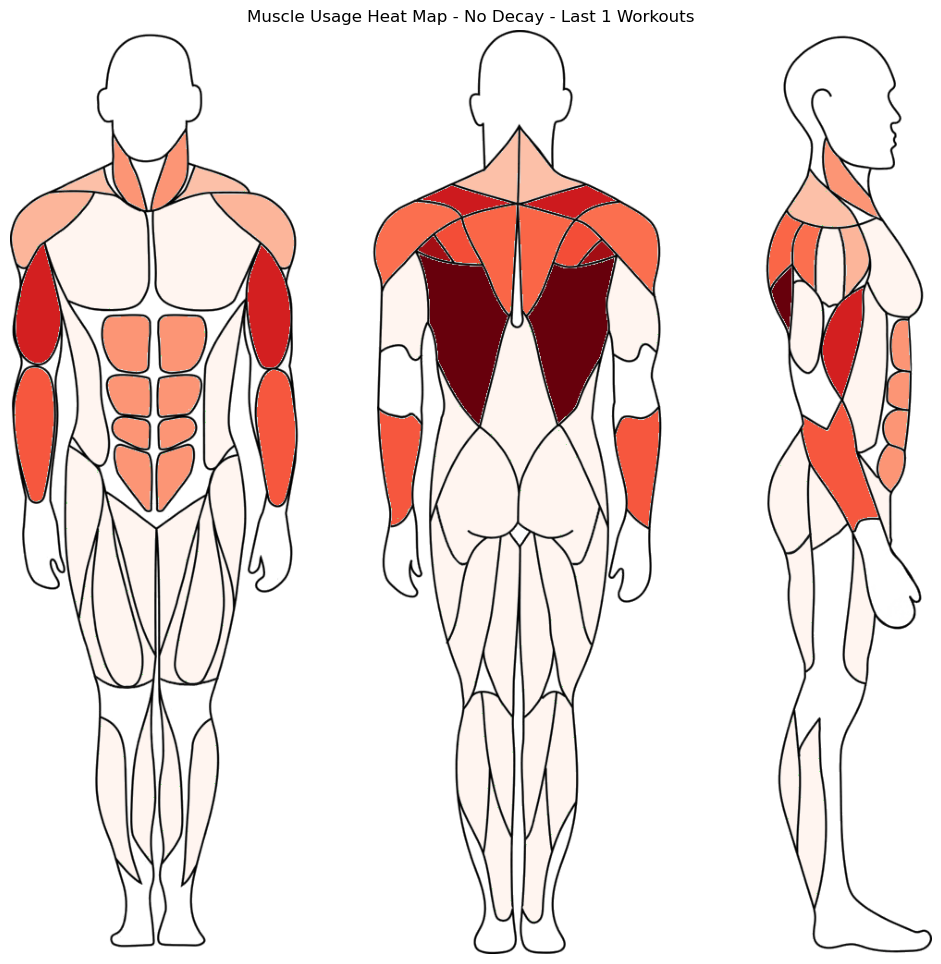

In [328]:
visualize_muscle_usage(df, visual_muscles, muscle_colors, 
                       decay_on=False, 
                       decay_by_workouts=False, 
                       time_range=None,
                       workout_range=1,
                       decay_factor=0.0)

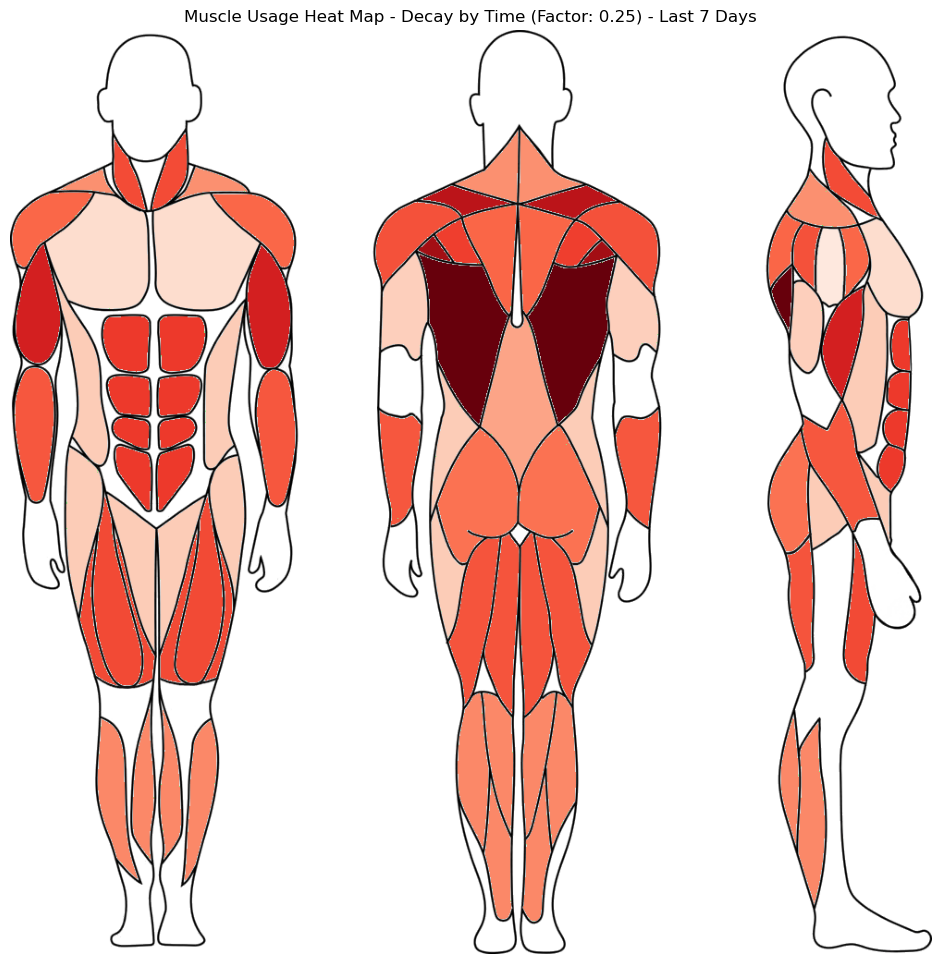

In [339]:
visualize_muscle_usage(df, visual_muscles, muscle_colors, 
                       decay_on=True, 
                       decay_by_workouts=False, 
                       time_range=7,
                       workout_range=None,
                       decay_factor=0.25)

### Calculating Usage for Major Groups using All Muscles
- The function `calculate_muscle_group_usage` calculates the usage intensity of major muscle groups by analyzing each exercise in a workout session.
    - It tracks unique muscles targeted within each muscle group, using sets to ensure no muscle is counted more than once per group.
    - For each exercise, the contribution to the muscle group is calculated based on the intensity and a weighted value derived from the muscle's specific contribution.
    - Muscle group usage is adjusted by the ratio of muscles targeted within the group, applying a power-based adjustment to emphasize groups with higher ratios.
    - The final usage for each muscle group is normalized into percentages, ensuring the total contribution across all groups sums to 100%.
    - This function is applied to each row in the DataFrame to generate a detailed breakdown of muscle group usage for every workout session.

In [330]:
def calculate_muscle_group_usage(row):
    total_usage = {}
    muscle_counts = {group: set() for group in muscle_groups}  # Use sets to track unique muscles

    # Process each exercise in the row
    for i in range(1, 6):
        exercise = row[f'Exercise {i}']
        intensity = row[f'E{i} Intensity']
        if pd.notna(exercise) and pd.notna(intensity):
            muscles = analysis_muscles.get(exercise, {})
            for muscle, value in muscles.items():
                # Calculate contribution to the muscle based on intensity value
                contribution = (value**4) * intensity
                for group, muscles_in_group in muscle_groups.items():
                    if muscle in muscles_in_group:
                        muscle_counts[group].add(muscle)  # Add muscle to the set for the group
                        if group in total_usage:
                            total_usage[group] += contribution
                        else:
                            total_usage[group] = contribution
    
    # Adjust contributions by muscle ratios within each group
    for group, muscles in muscle_counts.items():
        count = len(muscles)  # Number of unique muscles used
        if count > 0:  # Adjust for any group that was targeted
            # Calculate the ratio of muscles used to total muscles in the group
            ratio = count / len(muscle_groups[group])
            # Apply a higher weight to higher ratios using a power less than 1
            adjustment_factor = 1 + (ratio ** 0.01)  # Exponent less than 1 to increase weight
            total_usage[group] *= adjustment_factor
    
    # Normalize to percentages
    total_value = sum(total_usage.values())
    if total_value > 0:
        for group in total_usage:
            total_usage[group] = (total_usage[group] / total_value) * 100
    
    return total_usage

# Apply the function to the DataFrame
df['Muscle Group Usage'] = df.apply(calculate_muscle_group_usage, axis=1)

### Printing Recent `n` Workout Details
- The function `print_workout_details` generates a detailed report for a single workout session, including exercises performed, intensity levels, workout duration, average intensity, and muscle group distribution.
    - It prints a header with the workout date, followed by a list of exercises performed, displaying each exercise's intensity and how it compares to the average intensity for that exercise across all workouts.
    - The function then provides details on the workout's duration, average intensity, and rating, comparing each to the overall averages across all sessions.
    - The muscle group distribution section shows the percentage of each major muscle group targeted during the workout, sorted by intensity.
- The `print_recent_workouts` function calculates the average intensity for each exercise and the overall averages for intensity, duration, and rating. It then uses `print_workout_details` to print a detailed summary for the most recent `n` workouts, allowing for easy review and comparison of past sessions.

In [331]:
def print_workout_details(row, exercise_avg, overall_avg_intensity, overall_avg_duration, overall_avg_rating):
    # Header for the workout
    print("=" * 56)
    print(f" WORKOUT DETAILS - {row['Date']}".center(60))
    print("=" * 56)
    
    # Section for exercises performed
    print("\nExercises Performed:")
    print("-" * 56)
    exercises_found = False  # Track if any exercise was found
    for i in range(1, 6):
        exercise = row.get(f'Exercise {i}', None)
        intensity = row.get(f'E{i} Intensity', None)
        if pd.notna(exercise) and pd.notna(intensity) and intensity != '':  # Check for empty string
            exercises_found = True
            intensity_float = float(intensity)
            # Calculate the difference from the average intensity of this exercise
            avg_intensity = exercise_avg.get(exercise, intensity_float)
            intensity_diff = intensity_float - avg_intensity
            print(f"  • {str(exercise).ljust(25)} | Intensity: {intensity_float:>5.1f} ({intensity_diff:+.2f})")
    
    # Handle case where no exercises were found
    if not exercises_found:
        print("  No exercises performed.")
    
    print("-" * 56)
    
    # Section for workout duration, average intensity, and rating
    average_intensity = float(row['Average Intensity'])
    overall_diff_intensity = average_intensity - overall_avg_intensity
    duration = float(row['Duration'])
    overall_diff_duration = duration - overall_avg_duration
    rating = float(row['Rating'])
    overall_diff_rating = rating - overall_avg_rating
    
    print(f"\nWorkout Duration: {duration:.1f} minutes ({overall_diff_duration:+.1f} mins)")
    print(f"Average Intensity: {average_intensity:.2f}/10 ({overall_diff_intensity:+.2f})")
    print(f"Workout Rating: {rating:.1f}/5 ({overall_diff_rating:+.2f})\n")
    
    # Section for muscle group distribution
    print("Muscle Group Distribution:")
    print("-" * 27)
    muscle_group_usage = row['Muscle Group Usage']
    for group, percentage in sorted(muscle_group_usage.items(), key=lambda x: x[1], reverse=True):
        print(f"  {str(group).ljust(15)} : {percentage:5.2f}%")
    print("-" * 27)
    
    # Footer for the workout
    print("=" * 56 + 3 * "\n")

def print_recent_workouts(df, n):
    # Calculate average intensity for each exercise across all workouts
    exercise_avg = {}
    for i in range(1, 6):
        exercises = df[f'Exercise {i}']
        intensities = df[f'E{i} Intensity']
        for exercise, intensity in zip(exercises, intensities):
            if pd.notna(exercise) and pd.notna(intensity):
                exercise_avg.setdefault(exercise, []).append(float(intensity))
    exercise_avg = {k: sum(v) / len(v) for k, v in exercise_avg.items()}
    
    # Calculate overall average intensity, duration, and rating
    overall_avg_intensity = df['Average Intensity'].mean()
    overall_avg_duration = df['Duration'].mean()
    overall_avg_rating = df['Rating'].mean()
    
    # Print details for the last n workouts
    for index, row in df.tail(n).iterrows():
        print_workout_details(row, exercise_avg, overall_avg_intensity, overall_avg_duration, overall_avg_rating)

# Example usage
print_recent_workouts(df, 1)

            WORKOUT DETAILS - 2024-09-04 00:00:00           

Exercises Performed:
--------------------------------------------------------
  • Lat Pulldown              | Intensity:   7.0 (+0.17)
  • Face-pulls                | Intensity:   4.0 (-0.33)
  • Bent-over Row             | Intensity:   8.0 (+2.00)
--------------------------------------------------------

Workout Duration: 35.0 minutes (+2.9 mins)
Average Intensity: 6.33/10 (+0.61)
Workout Rating: 7.0/5 (+1.36)

Muscle Group Distribution:
---------------------------
  Back            : 57.89%
  Shoulders       : 27.07%
  Arms            : 15.04%
---------------------------





### Calculating Exercise Similarity
- The function `calculate_similarity` assesses the similarity between two exercises by comparing the intensity values of muscles they target.
    - It identifies common muscles between the two exercises and calculates a similarity score based on the minimum intensity values for these muscles.
    - The similarity ratio is derived by dividing the similarity score by the maximum possible score, accounting for all muscles involved.
    - The function returns `True` if the similarity ratio meets or exceeds a specified threshold, indicating the exercises are sufficiently similar.
- The `generate_similarity_dict` function creates a dictionary that maps each exercise to others that are similar, based on the defined threshold.
    - This function iterates through pairs of exercises, using the `calculate_similarity` function to determine and store relationships between similar exercises.
    - The resulting dictionary provides a quick reference for identifying exercises that target muscles in a comparable way, aiding in exercise planning and analysis.

In [332]:
# Define the function to calculate similarity
def calculate_similarity(ex1, ex2, analysis_muscles, threshold=0.5):
    muscles_1 = analysis_muscles[ex1]
    muscles_2 = analysis_muscles[ex2]

    # Find common muscles
    common_muscles = set(muscles_1.keys()) & set(muscles_2.keys())

    if not common_muscles:
        return False

    # Calculate similarity score based on intensity values
    score = sum(min(muscles_1[muscle], muscles_2[muscle]) for muscle in common_muscles)
    max_possible_score = sum(max(muscles_1.get(muscle, 0), muscles_2.get(muscle, 0)) for muscle in set(muscles_1.keys()).union(set(muscles_2.keys())))

    similarity_ratio = score / max_possible_score

    return similarity_ratio >= threshold

# Function to generate a similarity dictionary
def generate_similarity_dict(analysis_muscles, threshold=0.5):
    exercise_similarity = {}

    exercises = list(analysis_muscles.keys())
    for i, ex1 in enumerate(exercises):
        for ex2 in exercises[i+1:]:
            if calculate_similarity(ex1, ex2, analysis_muscles, threshold):
                if ex1 not in exercise_similarity:
                    exercise_similarity[ex1] = []
                if ex2 not in exercise_similarity:
                    exercise_similarity[ex2] = []

                exercise_similarity[ex1].append(ex2)
                exercise_similarity[ex2].append(ex1)

    return exercise_similarity

# Example usage with a threshold of 0.6
exercise_similarity = generate_similarity_dict(analysis_muscles, threshold=0.85)

# Print the resulting similarity dictionary
print(exercise_similarity)

{'Bench Press': ['Incline Bench Press'], 'Incline Bench Press': ['Bench Press'], 'Lat Pulldown': ['Pull-Up'], 'Pull-Up': ['Lat Pulldown', 'Chin-up'], 'Seated Cable Row': ['Bent-over Row'], 'Bent-over Row': ['Seated Cable Row'], 'Shoulder Press': ['Military Press'], 'Military Press': ['Shoulder Press'], 'Chin-up': ['Pull-Up']}


### Recommending Exercises for Targeted Major Muscle Groups
- The function `calculate_muscle_group_percentage` computes the percentage contribution of an exercise to different muscle groups by raising the intensity values to a specified power, emphasizing higher intensity values.
- The `calculate_primary_group` function identifies the primary muscle group targeted by an exercise by selecting the group with the highest percentage contribution.
- The `calculate_target_alignment_score` function evaluates how well an exercise aligns with the desired target muscle groups, giving more weight to exercises that primarily target these groups.
- The `recommend_exercises` function generates personalized exercise recommendations by considering factors such as target muscle groups, recent exercise history, and exercise similarity.
  - **Scoring:** Exercises are scored based on their effectiveness in targeting the desired muscles, adjusted for factors like recent usage, novelty, and similarity to other exercises.
  - **Target Muscles:** The function aggregates muscles from the specified target groups to focus the recommendations on the most relevant exercises.
  - **Muscle Coverage:** As exercises are recommended, the function tracks the coverage of each target muscle, ensuring that all muscles receive adequate attention.
  - **Novelty and Similarity:** The function penalizes overused or similar exercises, promoting variety in the workout routine. New exercises are introduced with a reduced penalty to encourage their inclusion.
  - **Grouping:** The final recommendations are grouped by major muscle groups, with a limit on the number of exercises per group to maintain balance and focus.
- The output provides a structured list of exercises, indicating whether each exercise is new and detailing the specific muscles targeted, ensuring a comprehensive and well-rounded workout plan.

In [335]:
def calculate_muscle_group_percentage(exercise, exercise_muscles, muscle_groups, power=3):
    muscles = exercise_muscles.get(exercise, {})
    powered_muscles = {muscle: value**power for muscle, value in muscles.items()}
    total_value = sum(powered_muscles.values())
    group_percentages = {}
    for group, muscles_in_group in muscle_groups.items():
        group_value = sum(powered_muscles.get(muscle, 0) for muscle in muscles_in_group)
        group_percentages[group] = (group_value / total_value) * 100 if total_value > 0 else 0
    return group_percentages

def calculate_primary_group(exercise, exercise_muscles, muscle_groups):
    group_percentages = calculate_muscle_group_percentage(exercise, exercise_muscles, muscle_groups)
    return max(group_percentages, key=group_percentages.get)

def calculate_target_alignment_score(exercise, exercise_muscles, muscle_groups, target_groups):
    primary_group = calculate_primary_group(exercise, exercise_muscles, muscle_groups)
    group_percentages = calculate_muscle_group_percentage(exercise, exercise_muscles, muscle_groups)
    
    if primary_group in target_groups:
        return group_percentages[primary_group] ** 2  # Squaring to emphasize primary target alignment
    else:
        return max(group_percentages.get(group, 0) for group in target_groups) ** 0.5  # Sqrt to de-emphasize non-primary targets

def recommend_exercises(df, muscle_groups, exercise_muscles, target_groups, allow_new_exercises=False, target_coverage=2):
    def get_exercise_score(exercise, target_muscles, exercise_count, new_exercise_penalty, similar_exercise_penalty):
        base_score = sum((exercise_muscles[exercise].get(muscle, 0)**3) for muscle in target_muscles)
        
        alignment_score = calculate_target_alignment_score(exercise, exercise_muscles, muscle_groups, target_groups)
        
        # Combine base score with alignment score
        score = base_score * (alignment_score / 100)
        
        recent_factor = 1 / (exercise_count.get(exercise, 0) + 0.5)
        novelty_factor = new_exercise_penalty if exercise not in exercise_count else 1
        similarity_factor = 1 / (similar_exercise_penalty if exercise in exercise_similarity else 1)

        return score * recent_factor * novelty_factor * similarity_factor

    target_muscles = [muscle for group in target_groups for muscle in muscle_groups[group]]
    recent_exercises = df['Exercise 1'].tolist() + df['Exercise 2'].tolist() + df['Exercise 3'].tolist() + \
                       df['Exercise 4'].tolist() + df['Exercise 5'].tolist()
    exercise_count = Counter(exercise for exercise in recent_exercises if pd.notna(exercise))

    if allow_new_exercises:
        possible_exercises = set(exercise_muscles.keys())
    else:
        possible_exercises = set(exercise for exercise in exercise_count.keys() if exercise in exercise_muscles)

    relevant_exercises = [exercise for exercise in possible_exercises 
                          if any(muscle in target_muscles for muscle in exercise_muscles[exercise])]

    muscle_coverage = defaultdict(float)
    recommendations = []
    new_exercise_penalty = 1.0
    similar_exercise_penalty = 0.5

    while relevant_exercises and len(recommendations) < 5:
        scored_exercises = sorted(
            [(exercise, get_exercise_score(exercise, target_muscles, exercise_count, new_exercise_penalty, similar_exercise_penalty)) 
             for exercise in relevant_exercises],
            key=lambda x: x[1],
            reverse=True
        )

        if not scored_exercises:
            break

        exercise, score = scored_exercises[0]
        targeted_muscles = [muscle for muscle in target_muscles if muscle in exercise_muscles[exercise]]

        # Update muscle coverage
        for muscle in targeted_muscles:
            muscle_coverage[muscle] += exercise_muscles[exercise][muscle]

        is_new = "(new)" if exercise not in exercise_count else ""
        recommendations.append((exercise, targeted_muscles, is_new))
        
        if is_new:
            new_exercise_penalty = 0.7

        if exercise in exercise_similarity:
            for similar_ex in exercise_similarity[exercise]:
                relevant_exercises = [ex for ex in relevant_exercises if ex != similar_ex]
                exercise_count[similar_ex] += 1

        relevant_exercises.remove(exercise)

        # Check if all target muscles have been sufficiently covered
        if all(muscle_coverage[muscle] >= target_coverage for muscle in target_muscles):
            break

    # Group exercises by their major muscle group
    grouped_recommendations = defaultdict(list)
    for exercise, muscles, is_new in recommendations:
        primary_group = calculate_primary_group(exercise, exercise_muscles, muscle_groups)
        if primary_group in target_groups:
            if len(grouped_recommendations[primary_group]) < 3 or len(target_groups) == 1:
                grouped_recommendations[primary_group].append((exercise, muscles, is_new))

    return grouped_recommendations

# Example usage
target_groups = ['Shoulders']  # You can specify one or two groups
allow_new_exercises = True  # Set to True to allow new exercises
grouped_recommendations = recommend_exercises(df, muscle_groups, analysis_muscles, target_groups, allow_new_exercises, target_coverage=2)

# Output formatting
print(f"Exercise Recommendations for Target Groups: {', '.join(target_groups)}")
print("=" * 60)

for group, exercises in grouped_recommendations.items():
    print(f"\n{group}:")
    for idx, (exercise, muscles, is_new) in enumerate(exercises, start=1):
        print(f"{idx}. {exercise} {is_new}")
        print(f"   - {', '.join(muscles)}")

Exercise Recommendations for Target Groups: Shoulders

Shoulders:
1. Shoulder Press 
   - Anterior Deltoid, Lateral Deltoid, Posterior Deltoid, Upper Trapezius
2. Dumbbell Shrugs 
   - Levator Scapulae, Upper Trapezius, Middle Trapezius
3. Lateral Raise 
   - Anterior Deltoid, Lateral Deltoid, Posterior Deltoid, Supraspinatus, Upper Trapezius, Middle Trapezius
4. Face-pulls 
   - Lateral Deltoid, Posterior Deltoid, Upper Trapezius, Middle Trapezius
